In [15]:
# LSTM for Stock Price Prediction
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [17]:
# Get the data using yfinance library from past until now
import yfinance as yf
data = yf.download('WINS.JK', start='2010-01-01', end='2024-06-23')

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date', ylabel='Close Prices Rupiah (Rp)'>

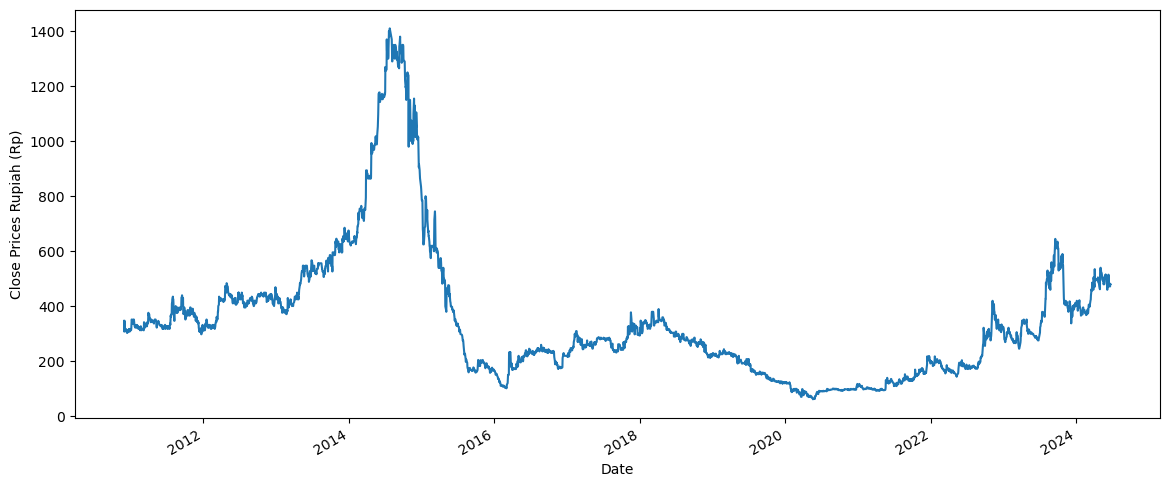

In [19]:
plt.figure(figsize=(14,6))
plt.xlabel('Days')
plt.ylabel('Close Prices Rupiah (Rp)')
data["Close"].plot()

In [20]:
len(data)

3345

In [21]:
# Doing Exploratory Data Analysis
data.info()
data.describe()
# data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3345 entries, 2010-11-29 to 2024-06-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3345 non-null   float64
 1   High       3345 non-null   float64
 2   Low        3345 non-null   float64
 3   Close      3345 non-null   float64
 4   Adj Close  3345 non-null   float64
 5   Volume     3345 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 182.9 KB


,Open,High,Low,Close,Adj Close,Volume
count,3345.000000,3345.000000,3345.000000,3345.000000,3345.000000,3.345000e+03
mean,345.322469,352.878836,337.938451,345.124828,343.466472,7.033383e+06
std,246.230215,251.054157,241.377523,246.021861,245.200244,2.122987e+07
min,63.000000,63.000000,60.000000,62.000000,62.000000,0.000000e+00
25%,184.000000,189.000000,178.000000,183.000000,183.000000,1.852000e+05
50%,292.000000,300.000000,288.000000,292.000000,292.000000,1.468900e+06
75%,415.536713,420.425385,405.759369,415.536713,410.999359,5.348594e+06
max,1410.000000,1520.000000,1380.000000,1410.000000,1410.000000,4.562517e+08


In [22]:
data.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-20,474.0,490.0,466.0,482.0,482.0,4425100
2024-06-21,482.0,486.0,476.0,480.0,480.0,1667600


In [24]:
# Make a new dataframe to only include the Close column
new_data = data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = new_data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

In [25]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [26]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays
x_train, y_train = numpy.array(x_train), numpy.array(y_train)

# Reshape the data
x_train = numpy.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.21149508, 0.18248221, 0.21149508, 0.19336205, 0.18973544,
       0.18973544, 0.18973544, 0.18610882, 0.18248221, 0.18248221,
       0.1788556 , 0.1788556 , 0.18610882, 0.18248221, 0.18610882,
       0.18248221, 0.18610882, 0.18973544, 0.18248221, 0.18973544,
       0.18610882, 0.18610882, 0.18610882, 0.18973544, 0.20061525,
       0.21512169, 0.21512169, 0.20424186, 0.20424186, 0.20424186,
       0.20424186, 0.21512169, 0.21512169, 0.21149508, 0.20424186,
       0.20061525, 0.19698863, 0.19336205, 0.19336205, 0.19698863,
       0.19698863, 0.20061525, 0.19336205, 0.19336205, 0.20061525,
       0.19336205, 0.19698863, 0.19698863, 0.18973544, 0.19336205,
       0.19336205, 0.19336205, 0.19336205, 0.18610882, 0.18973544,
       0.19698863, 0.19336205, 0.19336205, 0.18610882, 0.18973544])]
[0.18973543523680916]

[array([0.21149508, 0.18248221, 0.21149508, 0.19336205, 0.18973544,
       0.18973544, 0.18973544, 0.18610882, 0.18248221, 0.18248221,
       0.1788556 , 0.1788556 , 0.18

(2616, 60, 1)

In [27]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(25, return_sequences=False))
model.add(Dense(12))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
# Train the model with epoch 100
model.fit(x_train, y_train, batch_size=1, epochs=1)

2616/2616 [==============================] - 71s 26ms/step - loss: 9.7427e-04


In [29]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = numpy.array(x_test)

# Reshape the data
x_test = numpy.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 1s 17ms/step


In [31]:
# Get the root mean squared error (RMSE)
rmse = numpy.sqrt(numpy.mean(predictions - y_test) ** 2)
print("RMSE :",rmse)

RMSE : 29.61218249174155


C:\Users\Galan\AppData\Local\Temp\ipykernel_10980\2752870389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


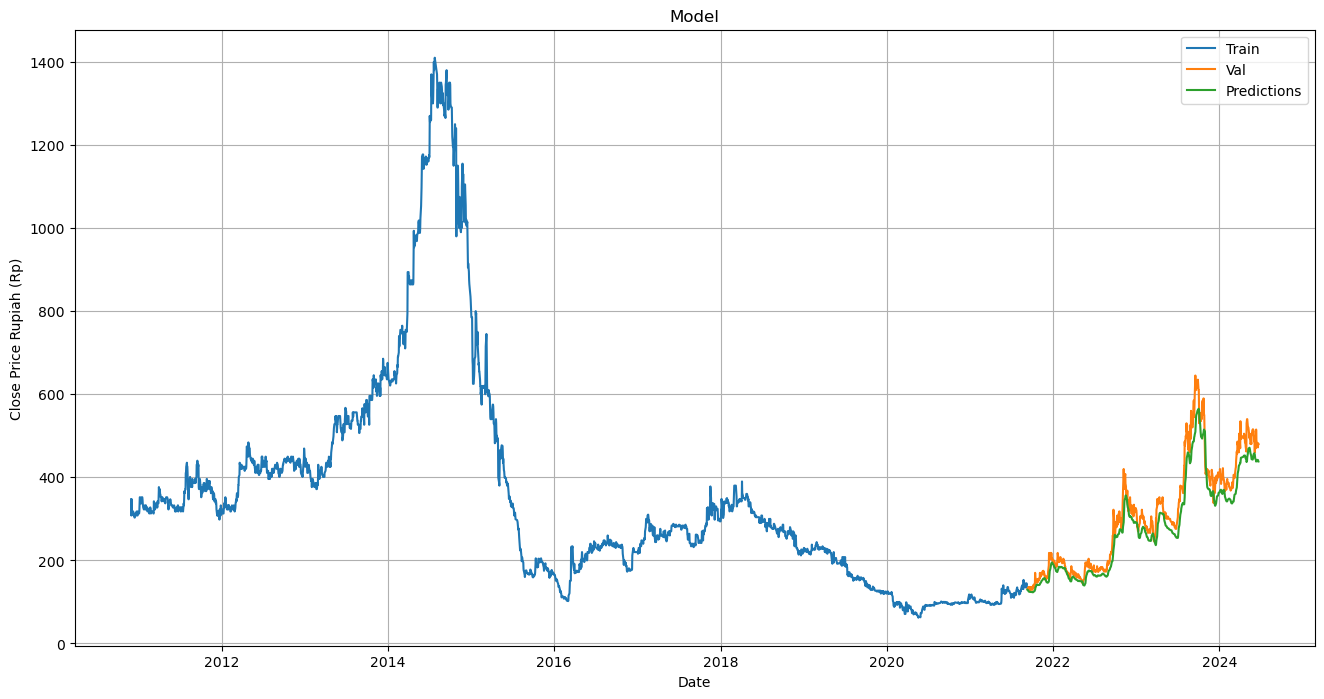

In [32]:
# Plot the data
train = new_data[:training_data_len]
valid = new_data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price Rupiah (Rp)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.grid('visible= True')
plt.show()

In [33]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-09-10,131.0,129.296646
2021-09-13,129.0,128.011948
2021-09-14,135.0,126.422043
2021-09-15,133.0,125.539665
2021-09-16,135.0,124.928619
...,...,...
2024-06-13,486.0,441.353119
2024-06-14,484.0,441.903931
2024-06-19,472.0,441.661438


In [34]:
# make a new column in the valid to show the difference between the close and predictions
valid['Difference'] = valid['Close'] - valid['Predictions']
valid

C:\Users\Galan\AppData\Local\Temp\ipykernel_10980\2577514460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Difference'] = valid['Close'] - valid['Predictions']


,Close,Predictions,Difference
Date,,,
2021-09-10,131.0,129.296646,1.703354
2021-09-13,129.0,128.011948,0.988052
2021-09-14,135.0,126.422043,8.577957
2021-09-15,133.0,125.539665,7.460335
2021-09-16,135.0,124.928619,10.071381
...,...,...,...
2024-06-13,486.0,441.353119,44.646881
2024-06-14,484.0,441.903931,42.096069
2024-06-19,472.0,441.661438,30.338562


7/7 [==============================] - 0s 36ms/step


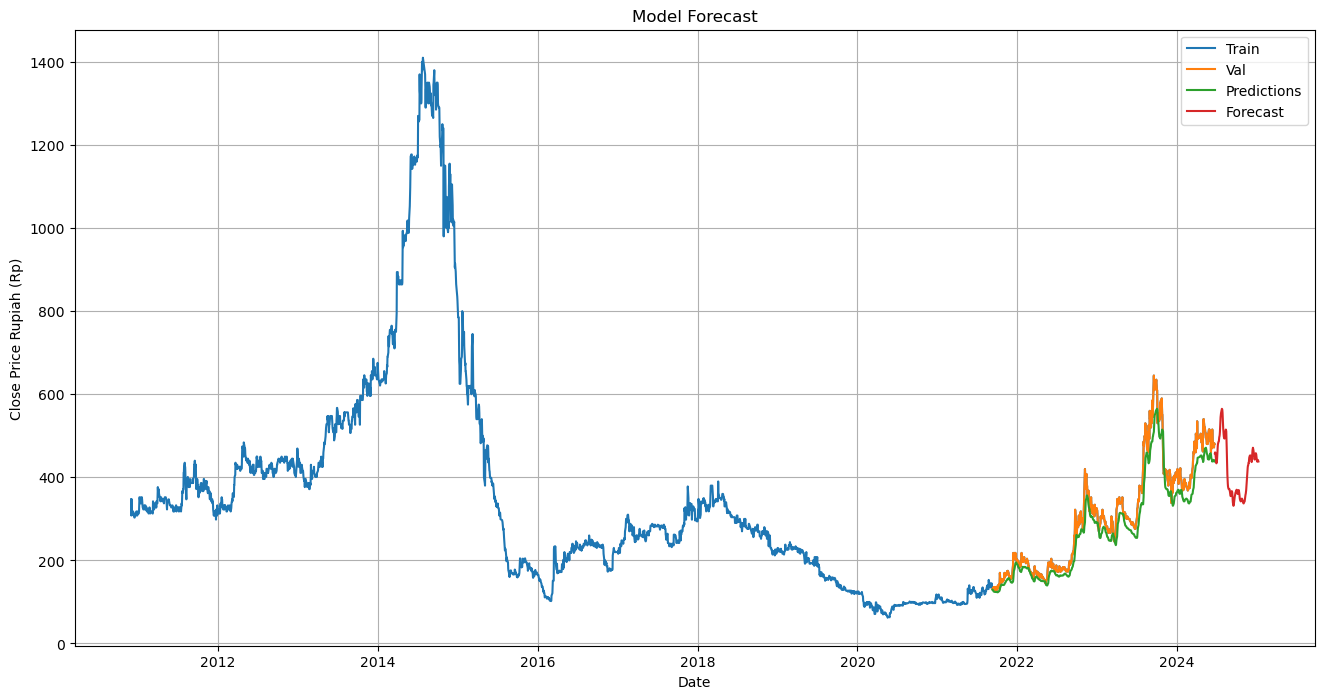

In [40]:
# Forecasting the next 200 days
# Generate the forecast for the next 200 days
forecast = model.predict(x_test[-200:])
forecast = scaler.inverse_transform(forecast)
forecast = forecast.flatten()
forecast_dates = pandas.date_range(start='2024-06-23', periods=200)
forecast = pandas.DataFrame(data=forecast, index=forecast_dates, columns=['Forecast'])

# Plot the forecast with the whole train and test data
plt.figure(figsize=(16,8))
plt.title('Model Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price Rupiah (Rp)')
plt.plot(new_data['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.plot(forecast)
plt.legend(['Train', 'Val', 'Predictions', 'Forecast'], loc='upper right')
plt.grid('visible= True')
plt.show()